In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/6th Semester/CSE427/Lab project/cardio_train.csv", sep=";")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
### Target 0 or 1.
## 1 means they have crdiovascular disease.
## 0 means they don't have crdiovascular disease.


In [ ]:
df["cardio"].value_counts()  ##error coz it wasn't seperated. ## couting different values

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

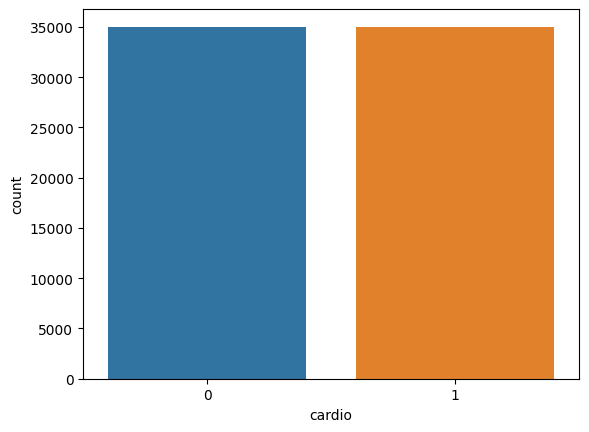

In [ ]:
sns.countplot(x = "cardio", data= df)

In [ ]:
df.isnull().values.any()  ###  no need to handle data

False

In [ ]:
df.isna().sum()  ## to check where null value is there was true

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

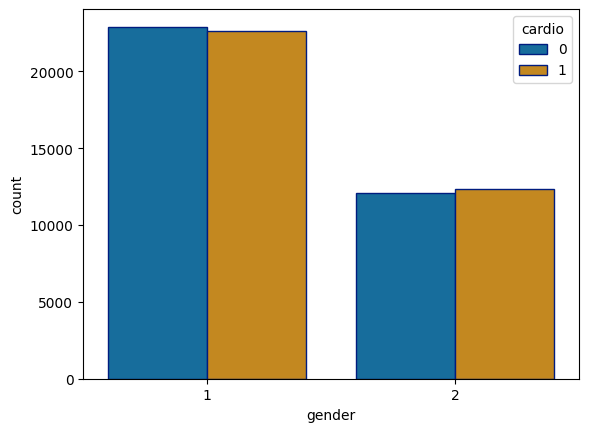

In [ ]:
sns.countplot(x = 'gender', hue = 'cardio', data = df,palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [ ]:
### it will take nearly 2-5 minutes since different types of age. Huge data

<Axes: xlabel='age', ylabel='count'>

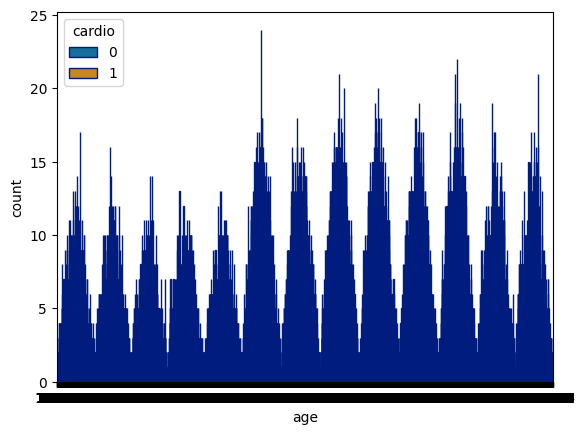

In [ ]:
sns.countplot(x = 'age', hue = 'cardio', data = df,palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [ ]:
df['age']=(df['age']/365).round(0)  ## routing to avoid fraction.
df['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

<Axes: xlabel='age', ylabel='count'>

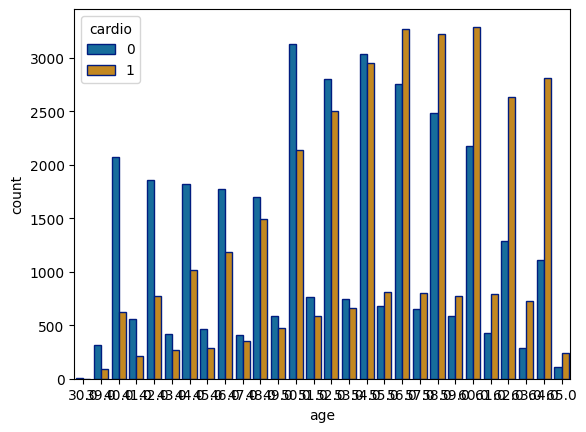

In [ ]:
sns.countplot(x = 'age', hue = 'cardio', data = df,palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [ ]:
### Here, we see that with the passing age, rate of heart disease increases.

In [ ]:
###Using random forest, we can predict the accuracy.

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr()   ##co relation has been show X and Y axis

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003050,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003050,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,0.003502,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [ ]:
#df = df.drop(['age'], axis=1)  ## May comment this.

In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
x = df.iloc[:,:-1]
x  ### So, there is 13 column since we created the year. We can drop it to work with the actual dataset in the previous cell.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1
69996,62.0,1,158,126.0,140,90,2,2,0,0,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0
69998,61.0,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y = df.iloc[:,10]
y

0        1
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    0
69998    0
69999    1
Name: active, Length: 70000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=1)  ## working with 30% data

In [ ]:
### Here, Xtrain and Ytrain we created so that we can train the data.
### But, for testing the data we created xtest, ytest

In [ ]:
xtrain  ### We can put ytrain, ytest and these to check it.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,44.0,2,169,71.0,100,80,1,1,1,0,1
34858,40.0,1,158,69.0,140,80,2,1,0,0,1
54953,56.0,1,164,65.0,120,80,1,1,0,0,1
59230,46.0,1,153,53.0,100,60,1,1,0,0,1
1730,58.0,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,58.0,2,175,78.0,120,80,1,1,0,0,1
20609,52.0,1,164,68.0,120,80,1,1,0,0,0
21440,49.0,2,178,82.0,120,80,1,1,0,0,1
50057,60.0,1,169,77.0,120,80,1,1,0,0,0


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf = RandomForestClassifier() ## Now, we will fit the data

In [ ]:
Rclf.fit(xtrain, ytrain)  ## Training the model

RandomForestClassifier()

In [ ]:
Rclf.score(xtest, ytest)  ## We are testing that 30% data.

1.0

In [ ]:
### The comment is that, since the ratio was nearly 50-50, the test case should have been more. But here, it is only 70%.

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Clf = DecisionTreeClassifier()

In [ ]:
Clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
Clf.score(xtest, ytest)

1.0

#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the heart disease dataset
heart = pd.read_csv("/content/drive/MyDrive/6th Semester/CSE427/Lab project/cardio_train.csv", sep=";")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:, :-1], heart.iloc[:, -1], test_size=0.3, random_state=42)

# Scale the features of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Test the Logistic Regression model
y_pred = lr.predict(X_test)


# Evaluate the performance of the Logistic Regression model
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy: 0.72
Precision: 0.74


In [ ]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the model
logreg_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.7198095238095238
Confusion Matrix:
[[7965 2496]
 [3388 7151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



#SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the heart disease dataset
heart = pd.read_csv("/content/drive/MyDrive/6th Semester/CSE427/Lab project/cardio_train.csv", sep=";")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:, :-1], heart.iloc[:, -1], test_size=0.3, random_state=42)

# Scale the features of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Test the SVM model
y_pred = svm.predict(X_test)

# Evaluate the performance of the SVM model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy: 0.73
Precision: 0.77


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7261428571428571
Confusion Matrix:
[[8484 1977]
 [3774 6765]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75     10461
           1       0.77      0.64      0.70     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.72     21000
weighted avg       0.73      0.73      0.72     21000



#Naive Bayes algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:, :-1], heart.iloc[:, -1], test_size=0.3, random_state=0)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.549952380952381
Confusion Matrix:
[[10065   474]
 [ 8977  1484]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.96      0.68     10539
           1       0.76      0.14      0.24     10461

    accuracy                           0.55     21000
   macro avg       0.64      0.55      0.46     21000
weighted avg       0.64      0.55      0.46     21000

